# Linear Regression
Developed by Zion Knight (s3906411)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataFile = 'data/chartEventsPred.csv'

In [19]:
data = pd.read_csv(dataFile)
data.head()

,subject_id,label,charttime,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Blood Pressure,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,O2 saturation pulseoxymetry,PTT,Respiratory Rate,Sodium (serum),Systolic Blood Pressure,WBC
0,10000690,normal,2150-11-03 02:56:00,77.0,84.0,77.000000,NaN,NaN,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
1,10000690,normal,2150-11-04 03:03:00,84.0,117.0,80.500000,4.949747,7.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
2,10000690,normal,2150-11-04 10:00:00,117.0,120.0,92.666667,21.361960,33.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
3,10000690,normal,2150-11-04 17:54:00,120.0,107.0,107.000000,19.974984,3.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
4,10000690,normal,2150-11-05 05:36:00,107.0,97.0,114.666667,6.806859,-13.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35


In [20]:
data.describe()

,subject_id,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Blood Pressure,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,O2 saturation pulseoxymetry,PTT,Respiratory Rate,Sodium (serum),Systolic Blood Pressure,WBC
count,1.050293e+06,1.050293e+06,1.050293e+06,1.050293e+06,1.008303e+06,1.008303e+06,1.049809e+06,1.050101e+06,1.049824e+06,1.050138e+06,1.050293e+06,1.049168e+06,1.050207e+06,1.020981e+06,1.050060e+06,1.049828e+06,1.050139e+06,1.049126e+06
mean,1.500060e+07,1.459495e+02,1.456085e+02,1.463903e+02,2.183197e+01,-4.348296e-01,2.366236e+01,7.930316e+01,1.041675e+00,6.303344e+01,8.530683e+01,9.943717e+00,9.689324e+01,3.527808e+01,1.967262e+01,1.390381e+02,1.194864e+02,1.181617e+01
std,2.892088e+06,5.643688e+01,5.597436e+01,5.126338e+01,2.209954e+01,4.119800e+01,1.190262e+01,8.507934e+00,4.522443e-01,8.955334e+00,1.156809e+01,1.566320e+00,1.366070e+00,9.347755e+00,2.969362e+00,3.456867e+00,1.267196e+01,3.896100e+00
min,1.000069e+07,2.000000e+01,2.000000e+01,2.000000e+01,0.000000e+00,-8.760000e+02,1.000000e+00,5.228571e+01,0.000000e+00,3.655349e+01,4.621212e+01,5.414286e+00,9.231034e+01,1.730000e+01,1.027551e+01,1.293571e+02,8.013333e+01,1.000000e-01
25%,1.245938e+07,1.100000e+02,1.100000e+02,1.136667e+02,8.962886e+00,-1.700000e+01,1.440000e+01,7.310107e+01,7.000000e-01,5.675000e+01,7.710256e+01,8.757143e+00,9.600000e+01,2.823846e+01,1.748730e+01,1.367500e+02,1.101667e+02,9.080000e+00
50%,1.502151e+07,1.330000e+02,1.330000e+02,1.340000e+02,1.601041e+01,-1.000000e+00,2.080000e+01,7.825000e+01,9.333333e-01,6.229427e+01,8.480782e+01,9.664583e+00,9.698828e+01,3.213750e+01,1.950943e+01,1.389630e+02,1.181333e+02,1.150000e+01
75%,1.752505e+07,1.660000e+02,1.660000e+02,1.646667e+02,2.746513e+01,1.600000e+01,3.100000e+01,8.471154e+01,1.299099e+00,6.863868e+01,9.316212e+01,1.086667e+01,9.788235e+01,4.080988e+01,2.168174e+01,1.413333e+02,1.278250e+02,1.422000e+01
max,1.999999e+07,1.000000e+03,1.000000e+03,9.950000e+02,5.847773e+02,9.070000e+02,5.645455e+01,1.068136e+02,2.355882e+00,9.209677e+01,1.209091e+02,1.601250e+01,1.004185e+02,5.910000e+01,2.770588e+01,1.480000e+02,1.596667e+02,2.269000e+01


In [21]:
data.isnull().sum()

subject_id                         0
label                              0
charttime                          0
glucose                            0
next_glucose                       0
mean_last3                         0
std_last3                      41990
trend                          41990
BUN                              484
Blood Pressure                   192
Creatinine                       469
Diastolic Blood Pressure         155
Heart Rate                         0
Hemoglobin                      1125
O2 saturation pulseoxymetry       86
PTT                            29312
Respiratory Rate                 233
Sodium (serum)                   465
Systolic Blood Pressure          154
WBC                             1167
dtype: int64

In [22]:
data = data.dropna()
data.isnull().sum()
data.drop(['subject_id', 'charttime', 'label'], axis=1, inplace=True)

In [23]:
data.describe()

,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Blood Pressure,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,O2 saturation pulseoxymetry,PTT,Respiratory Rate,Sodium (serum),Systolic Blood Pressure,WBC
count,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000,982510.000000
mean,145.614858,145.285997,146.038986,21.707853,-0.396489,24.039217,79.197263,1.049708,62.852677,85.417968,9.882966,96.898574,35.400985,19.738423,139.066007,119.366047,11.885916
std,55.707739,55.389925,50.234619,21.936213,40.946406,11.929816,8.426146,0.455995,8.870609,11.467150,1.527226,1.354746,9.380282,2.959855,3.463532,12.586032,3.883293
min,20.000000,20.000000,21.666667,0.000000,-876.000000,1.000000,53.450000,0.076190,36.553488,46.212121,5.414286,92.310345,17.300000,10.275510,129.357143,80.133333,0.100000
25%,110.000000,110.000000,113.666667,8.962886,-17.000000,14.666667,73.066667,0.706667,56.617647,77.272727,8.733333,96.012048,28.284211,17.552529,136.750000,110.149606,9.166667
50%,133.000000,132.000000,134.000000,15.947832,-1.000000,21.239437,78.157658,0.940000,62.155556,84.912500,9.605128,96.996212,32.257143,19.584000,139.000000,118.045455,11.564286
75%,166.000000,165.000000,164.000000,27.300794,16.000000,31.500000,84.547619,1.308333,68.382583,93.206974,10.763333,97.878378,41.080769,21.747283,141.384615,127.621212,14.280000
max,1000.000000,1000.000000,885.333333,584.777308,907.000000,56.454545,106.813559,2.355882,92.095238,120.909091,16.012500,100.418478,59.100000,27.705882,148.000000,159.666667,22.690000


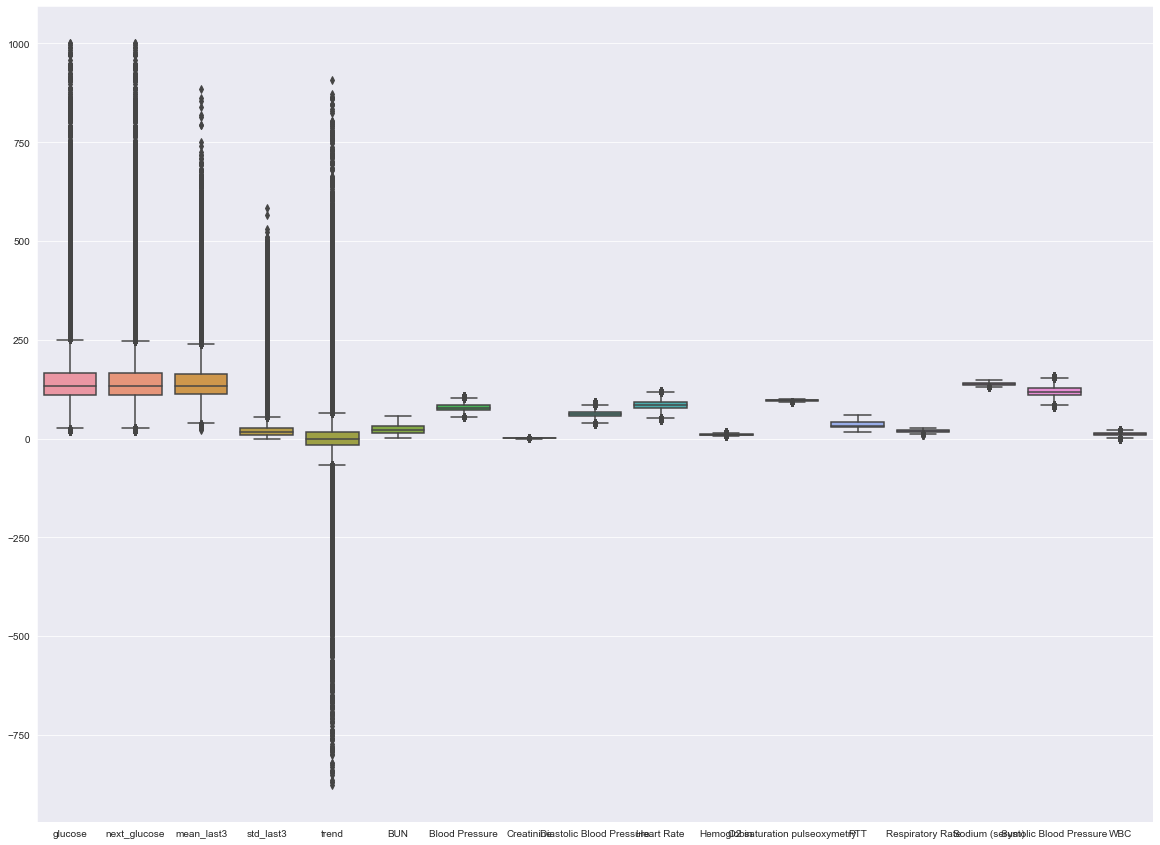

In [24]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.show()

In [25]:
y = data['next_glucose']
x = data.drop(['next_glucose'], axis=1)

In [26]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

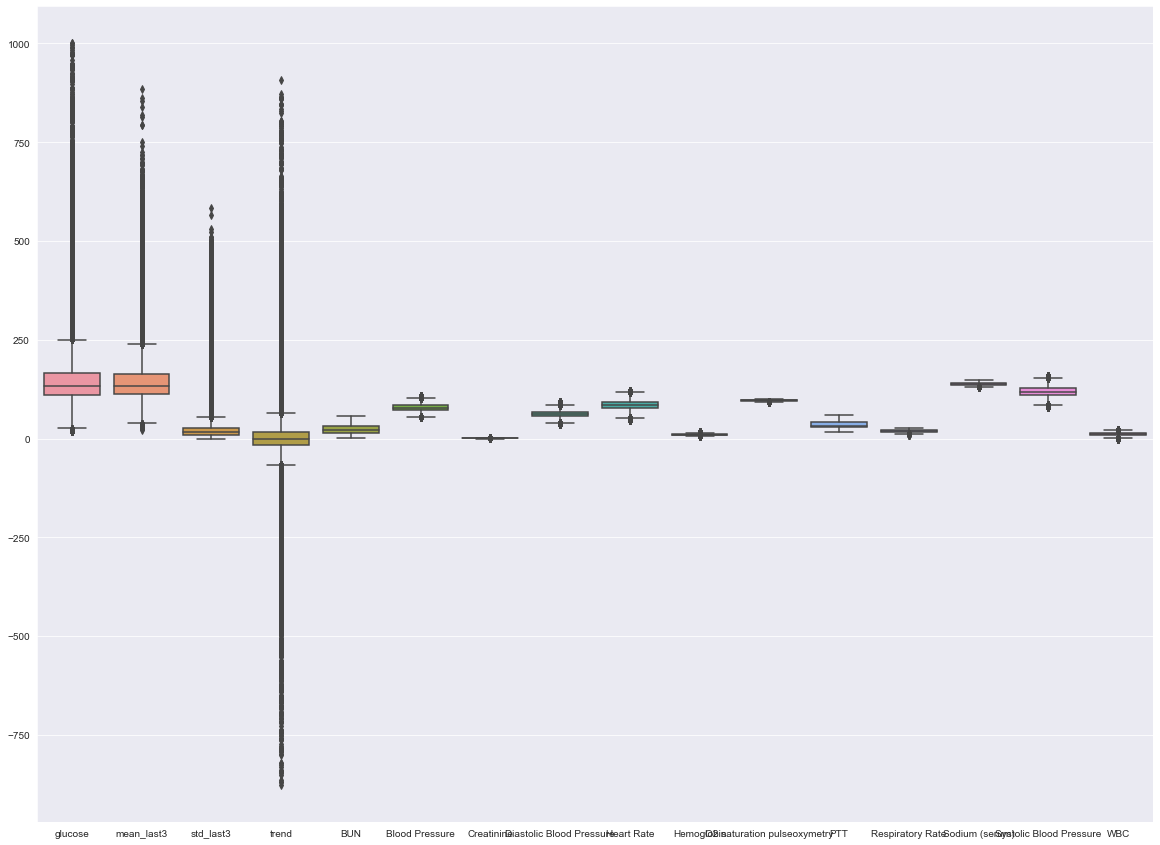

In [27]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=x)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

MSE = np.mean((y_test - y_pred)**2)
RMSE = np.sqrt(MSE)

print("MSE:", MSE)
print("RMSE:", RMSE)

MSE: 1357.0810448321524
RMSE: 36.838580928588335


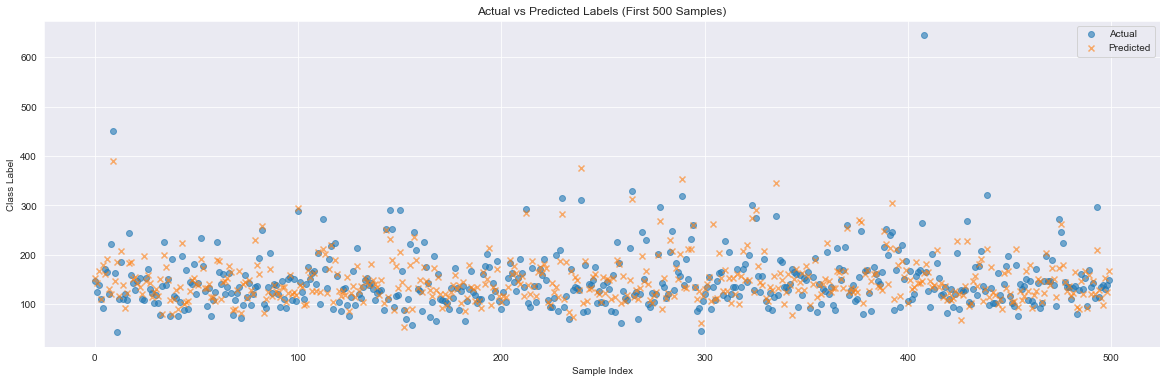

In [17]:
import matplotlib.pyplot as plt

N = 500  # Show only a subset for clarity

plt.figure(figsize=(20, 6))
plt.scatter(range(N), y_test[:N], label='Actual', marker='o', alpha=0.6)
plt.scatter(range(N), y_pred[:N], label='Predicted', marker='x', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted Labels (First {} Samples)'.format(N))
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.grid(True)
plt.show()
